# Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


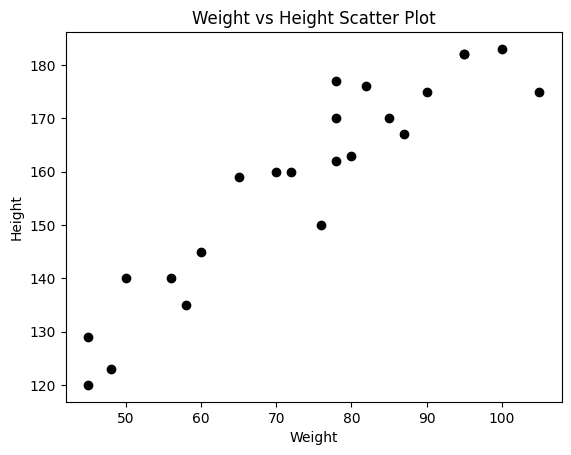

In [4]:
## Scatter Plot
plt.scatter(df['Weight'], df['Height'], color='black', marker='o')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height Scatter Plot')
plt.show()

### Correlation
- Correlation measures the strength and direction of a linear relationship between two variables.
- It is represented by the correlation coefficient (r), which ranges from -1 to 1.
- A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.
- Common methods to calculate correlation include Pearson's correlation coefficient, Spearman's rank correlation, and Kendall's tau.
- Correlation does not imply causation; it only indicates a relationship between variables.
- Visual representation of correlation can be done using scatter plots.
- Correlation is widely used in various fields such as finance, healthcare, and social sciences to identify relationships between variables.
- It is important to check for outliers, as they can significantly affect the correlation coefficient.
- Correlation analysis is often a preliminary step before conducting more complex statistical analyses.
- Understanding correlation helps in making informed decisions based on data relationships.
- Correlation can be affected by non-linear relationships, so it's essential to visualize data before interpreting correlation coefficients.
- In practice, correlation is used in risk management, portfolio optimization, and market analysis to assess how different assets move in relation to each other.
- Tools like Python (with libraries such as Pandas and NumPy) and R are commonly used to compute and visualize correlation in datasets.
- When reporting correlation results, it's important to include the sample size and significance level to provide context for the findings.
- Correlation matrices can be used to summarize the correlation coefficients between multiple variables in a dataset.
- Understanding the limitations of correlation is crucial, as it does not account for confounding variables that may influence the relationship between the two variables being studied.
- Advanced techniques like partial correlation can be used to control for the influence of additional variables when assessing the relationship between two primary variables.
- Correlation analysis is often used in exploratory data analysis (EDA) to identify potential relationships that warrant further investigation.
- In summary, correlation is a fundamental statistical concept that helps in understanding relationships between variables, guiding further analysis and decision-making processes.

In [5]:
## Finding Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


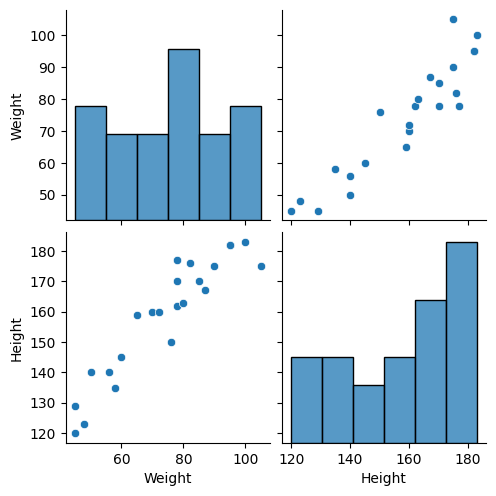

In [6]:
### Seaborn for visualization
sns.pairplot(df)

In [7]:
## Independent and Dependent features
X = df[['Weight']] ### Independent feature should be in data frame or 2D array
y = df['Height']  ### Dependent feature can be in series or 1D array

### Train Test Split
- Train-test split is a technique used to evaluate the performance of machine learning models.
- It involves dividing a dataset into two subsets: a training set and a testing set.
- The training set is used to train the model, while the testing set is used to evaluate its performance.
- A common split ratio is 80/20 or 70/30, where 80% of the data is used for training and 20% for testing.
- The purpose of the train-test split is to ensure that the model generalizes well to unseen data.
- It helps to prevent overfitting, where the model performs well on training data but poorly on new data.
- The split can be done randomly or using stratified sampling to maintain the distribution of target classes.
- In Python, the `train_test_split` function from the `sklearn.model_selection` module is commonly used to perform the split.
- After splitting the data, it is important to evaluate the model using appropriate metrics such as accuracy, precision, recall, and F1-score.
- Cross-validation can be used in conjunction with train-test split to further validate the model's performance.
- It is essential to ensure that the test set is not used during the training process to avoid data leakage.
- The train-test split technique is widely used in various machine learning applications, including classification and regression tasks.
- When working with time series data, it is important to maintain the temporal order of the data during the split.
- The train-test split is a fundamental step in the machine learning workflow, helping to build robust and reliable models.
- It is advisable to set a random seed during the split to ensure reproducibility of results.
- In summary, train-test split is a crucial technique for evaluating machine learning models, ensuring they perform well on unseen data and helping to prevent overfitting.

In [8]:
## Train test Split => 80% train and 20% test
## Basically we are splitting the data into two parts, one for training the model and other for testing the model
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
X_train.shape ## Output:(17, 1) -> that means 17 rows and 1 features

(17, 1)

### Standardization
- Standardization is a data preprocessing technique used to scale features to have a mean of 0 and a standard deviation of 1.
- It is particularly important for algorithms that rely on distance calculations, such as k-nearest neighbors and support vector machines.
- The formula for standardization is: z = (x - μ) / σ, where z is the standardized value, x is the original value, μ is the mean of the feature, and σ is the standard deviation.
- Standardization helps to ensure that all features contribute equally to the model's performance.
- It is commonly used in machine learning pipelines to improve model convergence and performance.
- In Python, the `StandardScaler` class from the `sklearn.preprocessing` module is often used to standardize features.
- Standardization is different from normalization, which scales features to a specific range, typically [0, 1].
- It is important to fit the standardization parameters (mean and standard deviation) on the training set and then apply the same transformation to the test set.
- Standardization can help to reduce the impact of outliers, although it does not eliminate them entirely.
- It is widely used in various applications, including finance, healthcare, and image processing, to prepare data for analysis.
- Standardization is particularly useful when features have different units or scales, ensuring that the model treats them equally.
- When using standardization, it is important to assess the distribution of the data, as it assumes a Gaussian distribution.
- In summary, standardization is a crucial preprocessing step in machine learning that helps to improve model performance by scaling features to a common scale, ensuring that they contribute equally to the analysis.

In [11]:
## Standardization of data => that means bringing data to same scale
from sklearn.preprocessing import StandardScaler

In [12]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)

In [13]:
X_test = scalar.transform(X_test)

In [14]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

### Simple Linear Regression
- Simple linear regression is a statistical method used to model the relationship between a dependent variable and a single independent variable.
- The goal is to find the best-fitting line (regression line) that predicts the dependent variable based on the independent variable.
- The equation of the regression line is typically represented as: Y = β0 + β1X + ε, where Y is the dependent variable, X is the independent variable, β0 is the y-intercept, β1 is the slope of the line, and ε is the error term.
- The slope (β1) indicates the change in the dependent variable for a one-unit change in the independent variable.
- Simple linear regression assumes a linear relationship between the two variables, homoscedasticity (constant variance of errors), independence of errors, and normally distributed errors.
- The parameters (β0 and β1) are typically estimated using the least squares method, which minimizes the sum of the squared differences between the observed and predicted values.
- In Python, the `LinearRegression` class from the `sklearn.linear_model` module is commonly used to perform simple linear regression.
- The performance of the regression model can be evaluated using metrics such as R-squared, mean squared error (MSE), and root mean squared error (RMSE).
- Simple linear regression is widely used in various fields, including economics, biology, and social sciences, to understand relationships between variables and make predictions.
- It is important to visualize the data using scatter plots to assess the linearity of the relationship before applying simple linear regression.
- Simple linear regression can be extended to multiple linear regression when more than one independent variable is involved.
- In summary, simple linear regression is a fundamental statistical technique for modeling and understanding the relationship between two variables, providing insights and predictions based on the linear association.

In [15]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [16]:
regression = LinearRegression(n_jobs=-1) ## n_jobs=-1 means use all the processors

In [17]:
regression.fit(X_train, y_train) ### Fitting the model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [18]:
print('Coefficient (Slope):', regression.coef_) ## Slope(m)
print('Intercept:', regression.intercept_) ## Intercept(c)

Coefficient (Slope): [17.2982057]
Intercept: 156.47058823529412


Text(0.5, 1.0, 'Weight vs Height (Training set)')

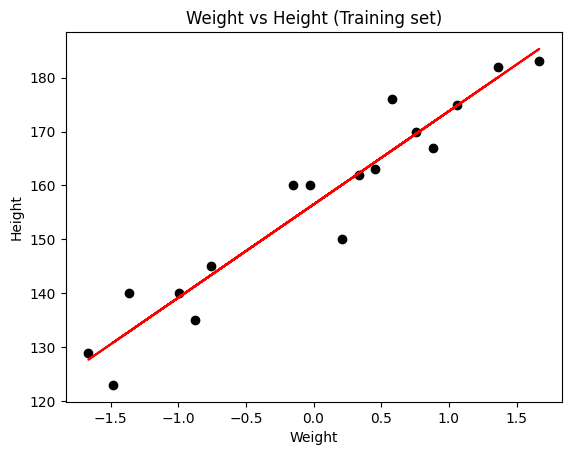

In [19]:
## Plot the trainig data best fit line
plt.scatter(X_train, y_train, color='black', marker='o')
plt.plot(X_train, regression.predict(X_train), color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height (Training set)')

### Prediction of test data

1. predicted height output = intercept + coef_(weight)
2. y_pred_test = 156.470 + 17.29(X_tes)

In [20]:
## Predictions for test data
y_pred = regression.predict(X_test)

In [21]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 114.84069295228699
Mean Absolute Error: 9.66512588679501
Root Mean Squared Error: 10.716374991212605


### R squared (R²)
formula:
R² = 1 - (SS_res / SS_tot)

- R² = coefficient of determination SS_res = Residual Sum of Squares SS_tot = Total Sum of Squares
---
Where:
- SS_res (Residual Sum of Squares) = Σ(yi - f(xi))²
- SS_tot (Total Sum of Squares) = Σ(yi - ȳ)²
- yi = actual value
- f(xi) = predicted value
- ȳ = mean of actual values
- R² value ranges from 0 to 1, where 1 indicates perfect prediction and 0 indicates no predictive power.
- An R² value of 0.85 means that 85% of the variance in the dependent variable is predictable from the independent variable.
- R² is commonly used to evaluate the performance of regression models.
- Higher R² values indicate better model fit.
- However, R² alone does not indicate whether the model is appropriate; other diagnostics should also be considered.
- R² can be negative for models that perform worse than a horizontal line (mean of the data).
- Adjusted R² is used when multiple predictors are involved to account for the number of predictors in the model.
- R² is sensitive to outliers, which can disproportionately affect the value.
- R² should be interpreted in the context of the specific field of study, as acceptable values can vary.
- R² does not imply causation; it only measures the strength of the association between variables.
- R² is widely used in various fields, including economics, biology, engineering, and social sciences, to assess the quality of regression models.
- In summary, R² is a key metric for evaluating the explanatory power of regression models, but it should be used alongside other metrics and diagnostics for a comprehensive assessment.

In [23]:
## r2 score
from sklearn.metrics import r2_score

In [24]:
score = r2_score(y_test, y_pred)
print('R2 Score:', score)

R2 Score: 0.7360826717981276


### Adjusted R squared (Adjusted R²)
formula:
- Adjusted R² = 1 - [(1 - R²)(n - 1) / (n - k - 1)]
---
Where:
- R² = coefficient of determination
- n = total number of observations
- k = number of independent variables (predictors)
- Adjusted R² accounts for the number of predictors in the model, providing a more accurate measure of model performance when multiple independent variables are involved.
- Unlike R², which can increase with the addition of more predictors regardless of their relevance, Adjusted R² penalizes the inclusion of non-significant predictors.
- Adjusted R² can decrease if the added predictors do not improve the model sufficiently.
- Adjusted R² is particularly useful in multiple regression analysis, where several independent variables are used
- to predict a dependent variable.
- Higher Adjusted R² values indicate a better fit of the model to the data, taking into account the number of predictors.
- Adjusted R² can be negative, indicating that the model is worse than a simple horizontal line (mean of the data).
- Adjusted R² is widely used in various fields, including economics, biology, engineering, and social sciences, to evaluate the performance of regression models with multiple predictors.
- In summary, Adjusted R² is a refined metric for assessing the explanatory power of regression models with multiple independent variables, helping to avoid overfitting by considering the number of predictors used.

In [25]:
## Display adjusted r squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

### OLS (Ordinary Least Squares) Linear Regression
- OLS is a method for estimating the parameters in a linear regression model by minimizing the sum
- of the squared differences between observed and predicted values.
- OLS aims to find the best-fitting line that represents the relationship between independent and dependent variables
- by minimizing the residual sum of squares (RSS).
- OLS assumes that the relationship between variables is linear, errors are normally distributed,
- and there is homoscedasticity (constant variance of errors).
- OLS provides estimates for coefficients, which indicate the change in the dependent variable for a one-unit change in the independent variable.
- OLS is widely used in various fields, including economics, biology, engineering, and social   sciences, for modeling relationships between variables.
- In summary, OLS is a fundamental technique for linear regression analysis, providing a method to estimate relationships between variables by minimizing prediction errors.

In [26]:
### OLS Linear Regression
import statsmodels.api as sm

In [27]:
model = sm.OLS(y_train, X_train).fit()

In [28]:
predictions = model.predict(X_test)
print(predictions)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [29]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 30 Dec 2025   Prob (F-statistic):                       0.664
Time:                        03:52:42   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\KIIT0001\anaconda3\envs\ai_ml_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [30]:
## prediction for new data
regression.predict(scalar.transform([[72]]))  ## Predict height for weight 72

c:\Users\KIIT0001\anaconda3\envs\ai_ml_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])